In [196]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("sample-test.csv")
df.drop(['name'], axis=1, inplace=True)
#df.drop(['name,''beta_kubernetes_io_arch', 'beta_kubernetes_io_os', 'container', 'id', 'image', 'instance', 'job', 'kubernetes_io_arch'],axis=1, inplace=True)
#df.drop(['kubernetes_io_os','kubernetes_io_hostname', 'minikube_k8s_io_commit', 'minikube_k8s_io_name', 'minikube_k8s_io_updated_at', 'minikube_k8s_io_version'],axis=1, inplace=True)
#df.drop(['name.1', 'namespace', 'node_ip', 'node_name', 'pod'],axis=1, inplace=True)
print(df)

     timestamp      values                         pod
0   1627481717  2154590208  my-cluster-metrics-kafka-2
1   1627481728  2154831872  my-cluster-metrics-kafka-2
2   1627481739  2155487232  my-cluster-metrics-kafka-2
3   1627481757  2155491328  my-cluster-metrics-kafka-2
4   1627481776  2149072896  my-cluster-metrics-kafka-2
..         ...         ...                         ...
71  1627482014  2354184192  my-cluster-metrics-kafka-0
72  1627482027  2350178304  my-cluster-metrics-kafka-0
73  1627482041  2350780416  my-cluster-metrics-kafka-0
74  1627482054  2350780416  my-cluster-metrics-kafka-0
75  1627482073  2350891008  my-cluster-metrics-kafka-0

[76 rows x 3 columns]


In [197]:
import datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df.head()

,timestamp,values,pod
0,2021-07-28 14:15:17,2154590208,my-cluster-metrics-kafka-2
1,2021-07-28 14:15:28,2154831872,my-cluster-metrics-kafka-2
2,2021-07-28 14:15:39,2155487232,my-cluster-metrics-kafka-2
3,2021-07-28 14:15:57,2155491328,my-cluster-metrics-kafka-2
4,2021-07-28 14:16:16,2149072896,my-cluster-metrics-kafka-2


In [99]:
meanbo = df['values'].mean
print(meanbo)

<bound method Series.mean of 0     2154590208
1     2154831872
2     2155487232
3     2155491328
4     2149072896
         ...    
71    2354184192
72    2350178304
73    2350780416
74    2350780416
75    2350891008
Name: values, Length: 76, dtype: int64>


In [100]:
broker0 = df[df['pod']=='my-cluster-metrics-kafka-0']
broker1 = df[df['pod']=='my-cluster-metrics-kafka-1']
broker2 = df[df['pod']=='my-cluster-metrics-kafka-2']

In [101]:
meanb0 = broker0['values'].mean
meanb1 = broker1['values'].mean
meanb2 = broker2['values'].mean
print(meanb0)
print(meanb1)
print(meanb2)

<bound method Series.mean of 51    2393980928
52    2394984448
53    2395140096
54    2386698240
55    2383204352
56    2384547840
57    2384297984
58    2384314368
59    2376642560
60    2377187328
61    2377109504
62    2377408512
63    2377740288
64    2372894720
65    2372993024
66    2372997120
67    2372997120
68    2353881088
69    2353885184
70    2354176000
71    2354184192
72    2350178304
73    2350780416
74    2350780416
75    2350891008
Name: values, dtype: int64>
<bound method Series.mean of 24    2396295168
25    2397466624
26    2397474816
27    2397896704
28    2397958144
29    2391023616
30    2387320832
31    2385272832
32    2386587648
33    2386669568
34    2387148800
35    2380226560
36    2380918784
37    2380955648
38    2381729792
39    2377035776
40    2377871360
41    2377895936
42    2377895936
43    2359775232
44    2360324096
45    2360225792
46    2356473856
47    2356473856
48    2357354496
49    2357383168
50    2357903360
Name: values, dtype: int64>
<b

In [91]:
broker0.drop(['pod'], axis=1, inplace=True)
broker1.drop(['pod'], axis=1, inplace=True)
broker2.drop(['pod'], axis=1, inplace=True)

C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [92]:
from scipy.stats import ttest_ind
result = ttest_ind(broker1['values'], broker2['values'])
print(result)

Ttest_indResult(statistic=61.70903911664685, pvalue=4.017592040895423e-48)


In [213]:
df1 =  pd.read_csv("memh_usage.csv")
df1.drop(['name'], axis=1, inplace=True)
df1['timestamp'] = pd.to_datetime(df1['timestamp'], unit='s')
df1.head(50)


,timestamp,values,pod
0,2021-07-28 13:51:36,2486665216,my-cluster-metrics-kafka-2
1,2021-07-28 13:51:47,2500530176,my-cluster-metrics-kafka-2
2,2021-07-28 13:52:05,2477924352,my-cluster-metrics-kafka-2
3,2021-07-28 13:52:19,2476687360,my-cluster-metrics-kafka-2
4,2021-07-28 13:52:31,2472173568,my-cluster-metrics-kafka-2
5,2021-07-28 13:52:41,2472890368,my-cluster-metrics-kafka-2
6,2021-07-28 13:52:52,2487324672,my-cluster-metrics-kafka-2
7,2021-07-28 13:53:05,2497433600,my-cluster-metrics-kafka-2
8,2021-07-28 13:53:23,2463522816,my-cluster-metrics-kafka-2
9,2021-07-28 13:53:41,2447966208,my-cluster-metrics-kafka-2


In [138]:
df1['Time'] = [datetime.datetime.time(d) for d in df1['timestamp']]
df1.head()

,timestamp,values,pod,Time
0,2021-07-28 14:15:17,225603617,my-cluster-metrics-kafka-2-BR,14:15:17
1,2021-07-28 14:15:28,207659469,my-cluster-metrics-kafka-2-BR,14:15:28
2,2021-07-28 14:15:39,190146852,my-cluster-metrics-kafka-2-BR,14:15:39
3,2021-07-28 14:15:57,198042731,my-cluster-metrics-kafka-2-DR,14:15:57
4,2021-07-28 14:16:16,203988478,my-cluster-metrics-kafka-2-DR,14:16:16


In [214]:
br = df1[(df1['timestamp'] >= '2021-07-28 13:51:36') & (df1['timestamp'] <= '2021-07-28 13:55:43')]
br.head(17)

,timestamp,values,pod
0,2021-07-28 13:51:36,2486665216,my-cluster-metrics-kafka-2
1,2021-07-28 13:51:47,2500530176,my-cluster-metrics-kafka-2
2,2021-07-28 13:52:05,2477924352,my-cluster-metrics-kafka-2
3,2021-07-28 13:52:19,2476687360,my-cluster-metrics-kafka-2
4,2021-07-28 13:52:31,2472173568,my-cluster-metrics-kafka-2
5,2021-07-28 13:52:41,2472890368,my-cluster-metrics-kafka-2
6,2021-07-28 13:52:52,2487324672,my-cluster-metrics-kafka-2
7,2021-07-28 13:53:05,2497433600,my-cluster-metrics-kafka-2
8,2021-07-28 13:53:23,2463522816,my-cluster-metrics-kafka-2
9,2021-07-28 13:53:41,2447966208,my-cluster-metrics-kafka-2


In [200]:
dr = df1[(df1['timestamp'] >= '2021-07-28 13:56:02') & (df1['timestamp'] <= '2021-07-28 14:03:17')]
dr.head(17)

,timestamp,values,pod
18,2021-07-28 13:56:02,2389041152,my-cluster-metrics-kafka-2
19,2021-07-28 13:56:18,2390720512,my-cluster-metrics-kafka-2
20,2021-07-28 13:56:29,2366562304,my-cluster-metrics-kafka-2
21,2021-07-28 13:56:48,2372112384,my-cluster-metrics-kafka-2
22,2021-07-28 13:56:59,2379722752,my-cluster-metrics-kafka-2
23,2021-07-28 13:57:17,2332954624,my-cluster-metrics-kafka-2
24,2021-07-28 13:57:37,2345701376,my-cluster-metrics-kafka-2
25,2021-07-28 13:57:48,2346758144,my-cluster-metrics-kafka-2
26,2021-07-28 13:58:05,2349838336,my-cluster-metrics-kafka-2
27,2021-07-28 13:58:22,2341953536,my-cluster-metrics-kafka-2


In [207]:
mbr = br['values'].mean()
print(mbr)
mdr = dr['values'].mean()
print(mdr)
br.describe()

2445114709.3333335
2328661060.266667


,values
count,1.800000e+01
mean,2.445115e+09
std,4.261118e+07
min,2.375574e+09
25%,2.411991e+09
50%,2.455745e+09
75%,2.477615e+09
max,2.500530e+09


In [203]:
res = ttest_ind(br['values'], dr['values'])
print(res)

Ttest_indResult(statistic=9.406498049884737, pvalue=2.7457223057856516e-12)


In [194]:
df2 =  pd.read_csv("sample.csv")
df2.drop(['name'], axis=1, inplace=True)
df2['timestamp'] = pd.to_datetime(df2['timestamp'], unit='s')
df2.head(3)

,timestamp,values
0,2021-07-13 23:38:36,1036161024
1,2021-07-13 23:38:49,1036144640
2,2021-07-13 23:39:05,1036156928


In [184]:
df2['Time'] = [datetime.datetime.time(d) for d in df2['timestamp']]
#df2.head()
df2['timestamp']=df2['Time']
#df2.head()
df2.drop(['Time'], axis=1, inplace=True)
df2.head()

,timestamp,values
0,23:38:36,1036161024
1,23:38:49,1036144640
2,23:39:05,1036156928
3,23:39:16,1036693504
4,23:39:30,1038397440


In [215]:
br.drop(['pod'], axis=1, inplace=True)
br.head(10)
br.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  18 non-null     datetime64[ns]
 1   values     18 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 432.0 bytes


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [222]:
from datetime import datetime

def convert_time(time):
    print(str(time))
    #print(datetime.strptime(str(time), "%Y-%m-%d %H:%M:%S"))
    return datetime.strptime(str(time), "%Y-%m-%d %H:%M:%S") 

br["cleaned_time"] = br['timestamp'].apply(convert_time)

2021-07-28 13:51:36
2021-07-28 13:51:47
2021-07-28 13:52:05
2021-07-28 13:52:19
2021-07-28 13:52:31
2021-07-28 13:52:41
2021-07-28 13:52:52
2021-07-28 13:53:05
2021-07-28 13:53:23
2021-07-28 13:53:41
2021-07-28 13:53:58
2021-07-28 13:54:13
2021-07-28 13:54:31
2021-07-28 13:54:46
2021-07-28 13:55:06
2021-07-28 13:55:19
2021-07-28 13:55:30
2021-07-28 13:55:43


<ipython-input-222-e4f8ef1053f8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  br["cleaned_time"] = br['timestamp'].apply(convert_time)


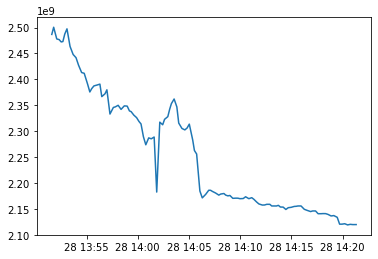

In [228]:
d=[]
for dat in df1.timestamp:
    # print (dat)
    d.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d,df1['values'])
plt.xticks(rotation=360)
plt.show()


In [220]:
br.head()

,timestamp,values,cleaned_time
0,2021-07-28 13:51:36,2486665216,2021-07-28 13:51:36
1,2021-07-28 13:51:47,2500530176,2021-07-28 13:51:47
2,2021-07-28 13:52:05,2477924352,2021-07-28 13:52:05
3,2021-07-28 13:52:19,2476687360,2021-07-28 13:52:19
4,2021-07-28 13:52:31,2472173568,2021-07-28 13:52:31


In [223]:
datetime.strptime("2012-07-31 19:00:31", "%Y-%m-%d %H:%M:%S")

datetime.datetime(2012, 7, 31, 19, 0, 31)

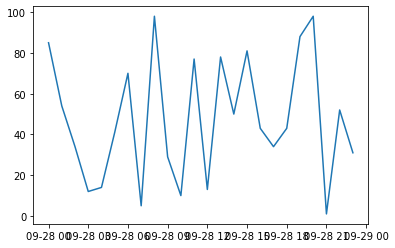

In [210]:
["cleaned_time"] = df['abc'].apply(convert_time)
from datetime import datetime
#datetime.strptime("2012-may-31 19:00", "%Y-%b-%d %H:%M")
datetime.strptime("2012-07-31 19:00:31", "%Y-%m-%d %H:%M:%S")

import matplotlib.pyplot as plt
import datetime
import numpy as np

x = np.array([datetime.datetime(2013, 9, 28, i, 0) for i in range(24)])
y = np.random.randint(100, size=x.shape)

plt.plot(x,y)
plt.show()
